# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [135]:
# CODE HERE

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [5]:
# CODE HERE
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [139]:
# CODE HERE

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

In [7]:
# CODE HERE
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

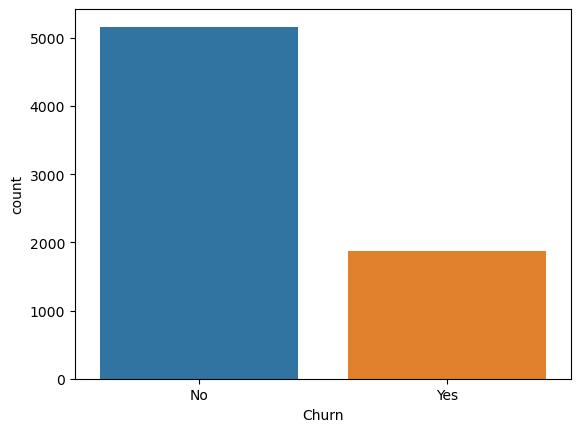

In [8]:
sns.countplot(data=df,x='Churn')

<img src='fig1.png' >

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

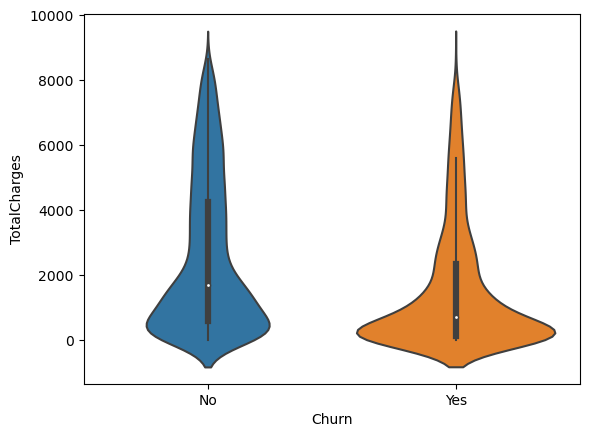

In [9]:
# CODE HERE
sns.violinplot(data=df,x='Churn',y='TotalCharges')

<img src='fig2.png' >

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

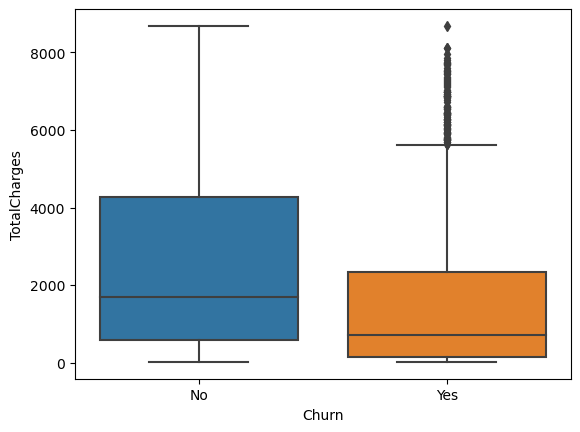

In [10]:
#CODE HERE
sns.boxplot(data=df,x='Churn',y='TotalCharges')

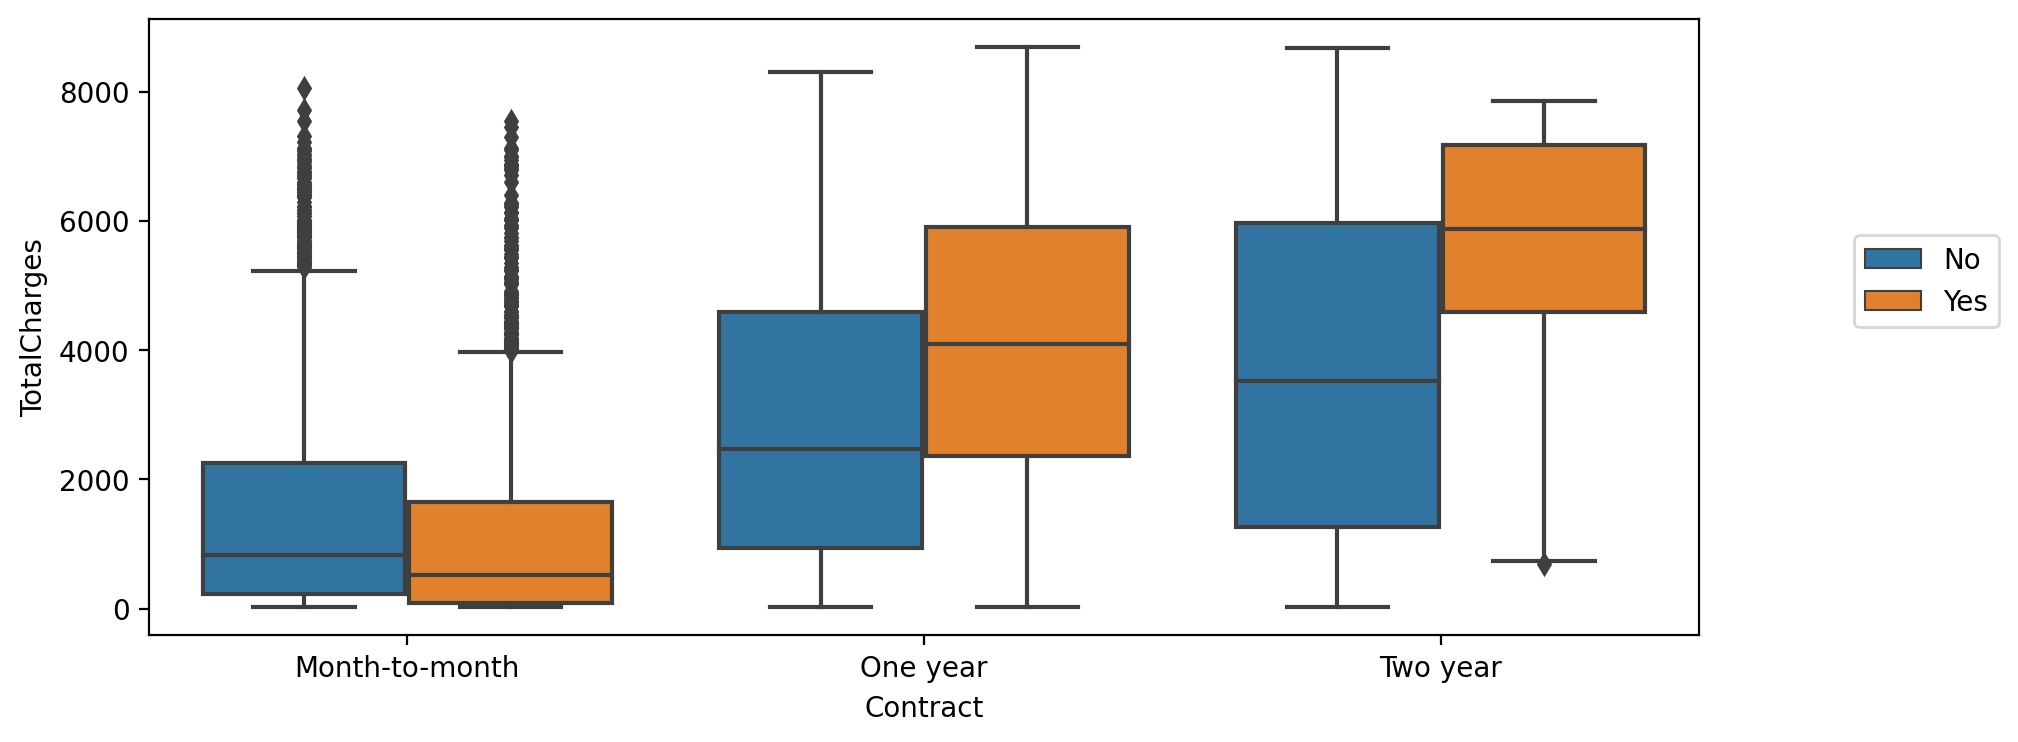

In [11]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

<img src='fig3.png' >

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [12]:
#CODE HERE
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']],dtype='int').corr()

In [14]:
corr_df['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

In [16]:
#Removing this Churn_Yes & Churn_NO features 
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

In [17]:
#Corr_yes_churn is a serise
corr_yes_churn.index

Index(['Contract_Two year', 'DeviceProtection_No internet service',
       'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'InternetService_No',
       'TechSupport_No internet service', 'OnlineBackup_No internet service',
       'OnlineSecurity_No internet service', 'PaperlessBilling_No',
       'Contract_One year', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'Dependents_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)', 'InternetService_DSL',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'PhoneService_No', 'gender_Male',
       'gender_Female', 'PhoneService_Yes', 'MultipleLines_Yes',
       'StreamingMovies_Yes', 'StreamingTV_Yes', 'StreamingTV_No',
       'StreamingMovies_No', 'Partner_No', 'SeniorCitizen', 'Dependents_No',
       'PaperlessBilling_Yes', 'DeviceProtection_No', 'Online

In [18]:
corr_yes_churn.values

array([-0.30155234, -0.22757762, -0.22757762, -0.22757762, -0.22757762,
       -0.22757762, -0.22757762, -0.22757762, -0.19145432, -0.17822502,
       -0.17126992, -0.16471591, -0.16312844, -0.14998193, -0.13468684,
       -0.12414143, -0.118136  , -0.09077285, -0.08230697, -0.06619252,
       -0.0326536 , -0.0116914 , -0.0116914 , -0.00854464,  0.00854464,
        0.0116914 ,  0.04003274,  0.06085994,  0.06325398,  0.12843503,
        0.1309203 ,  0.14998193,  0.15054105,  0.16312844,  0.19145432,
        0.25205563,  0.26759512,  0.30145464,  0.30746259,  0.3368771 ,
        0.3422352 ,  0.40456455])

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

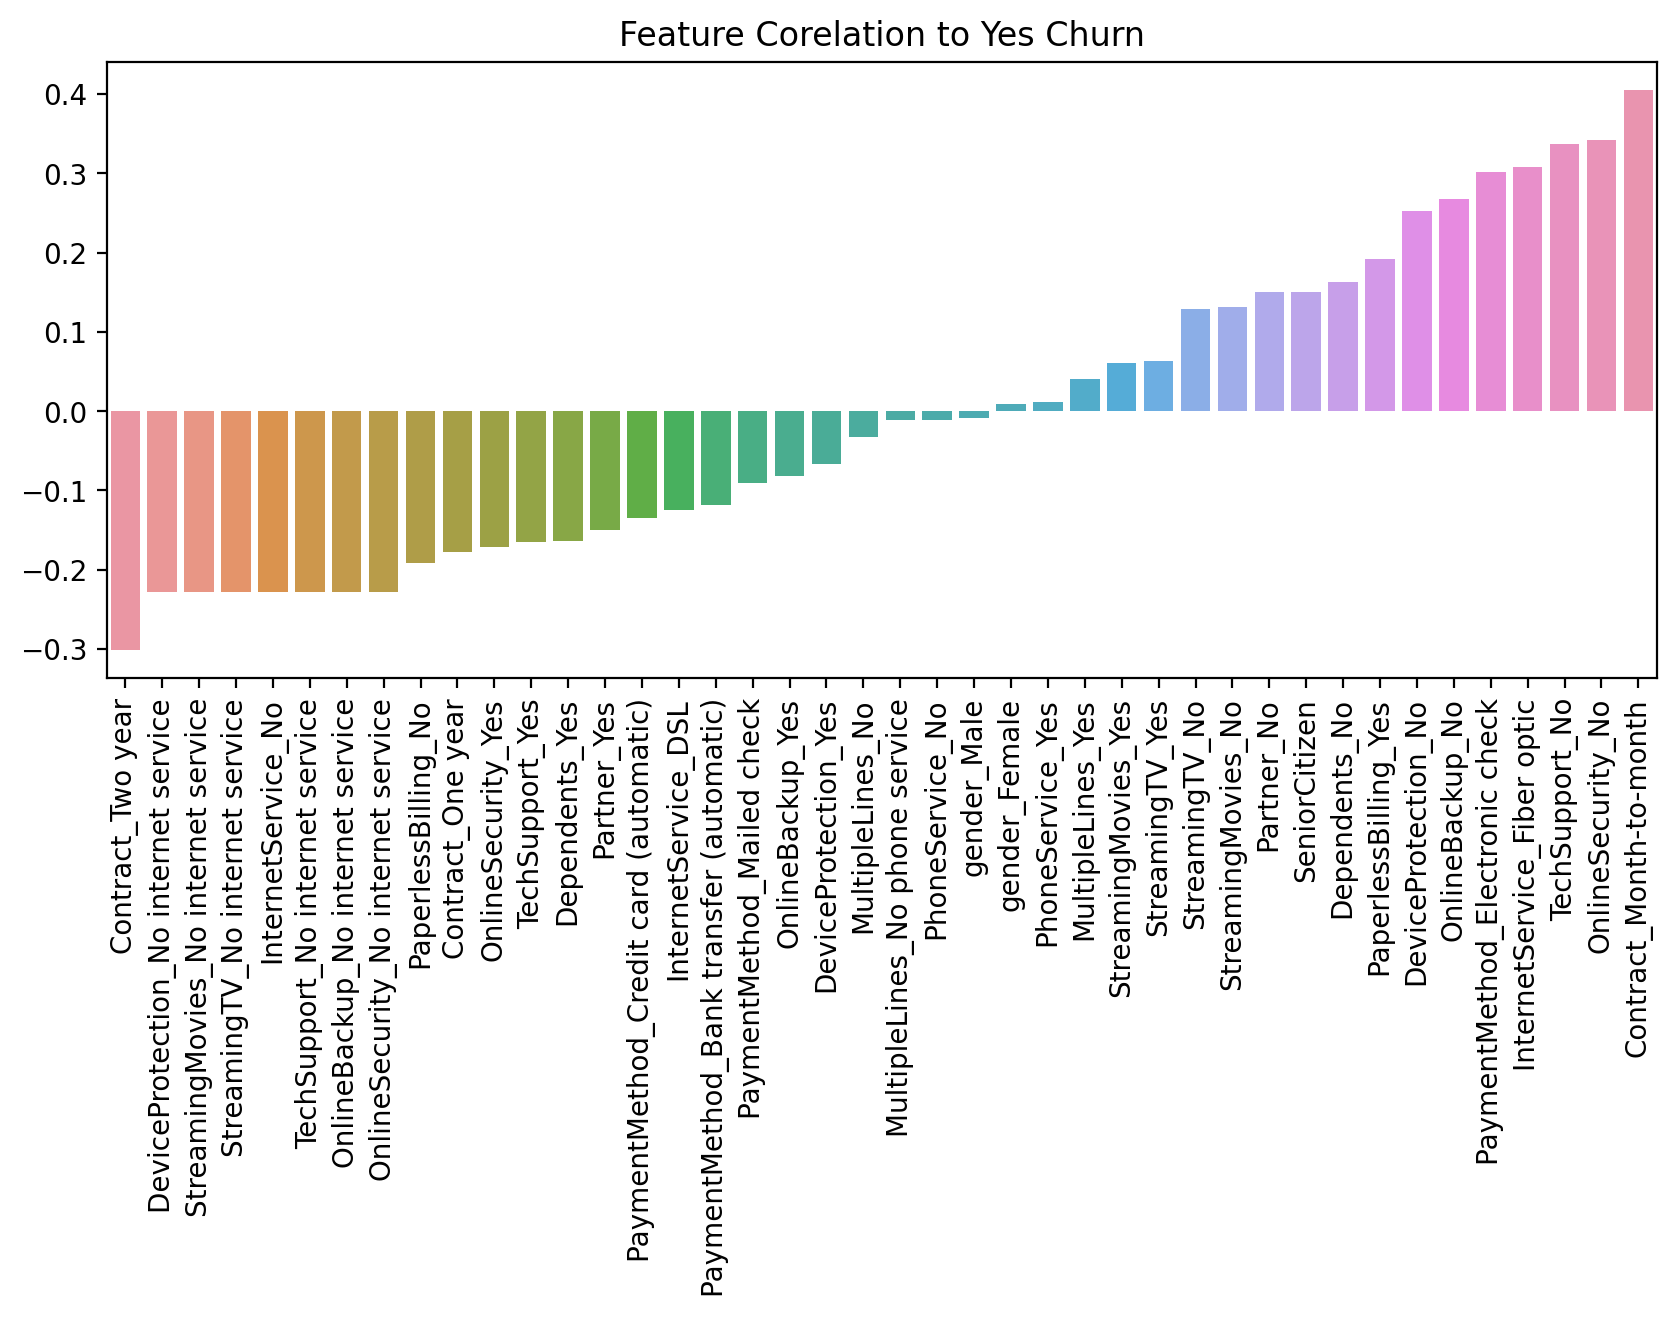

In [23]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_yes_churn.index,y=corr_yes_churn.values)
plt.title('Feature Corelation to Yes Churn')
plt.xticks(rotation=90);

<img src='figbar.png'>

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [152]:
# CODE HERE

In [24]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [25]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<Axes: xlabel='tenure', ylabel='Count'>

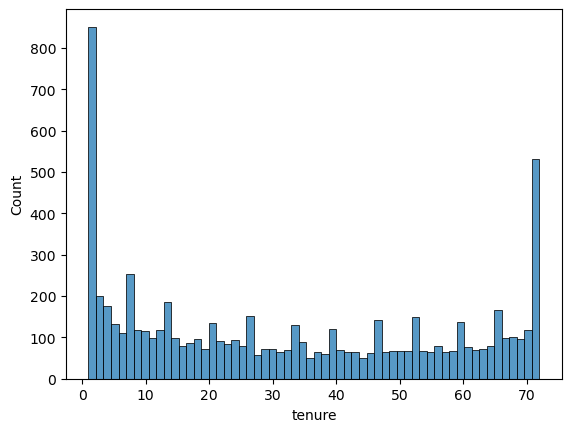

In [27]:
#CODE HERE
sns.histplot(data=df,x='tenure',bins=60)

<img src="fig5.png">

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

C:\Users\jagam\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


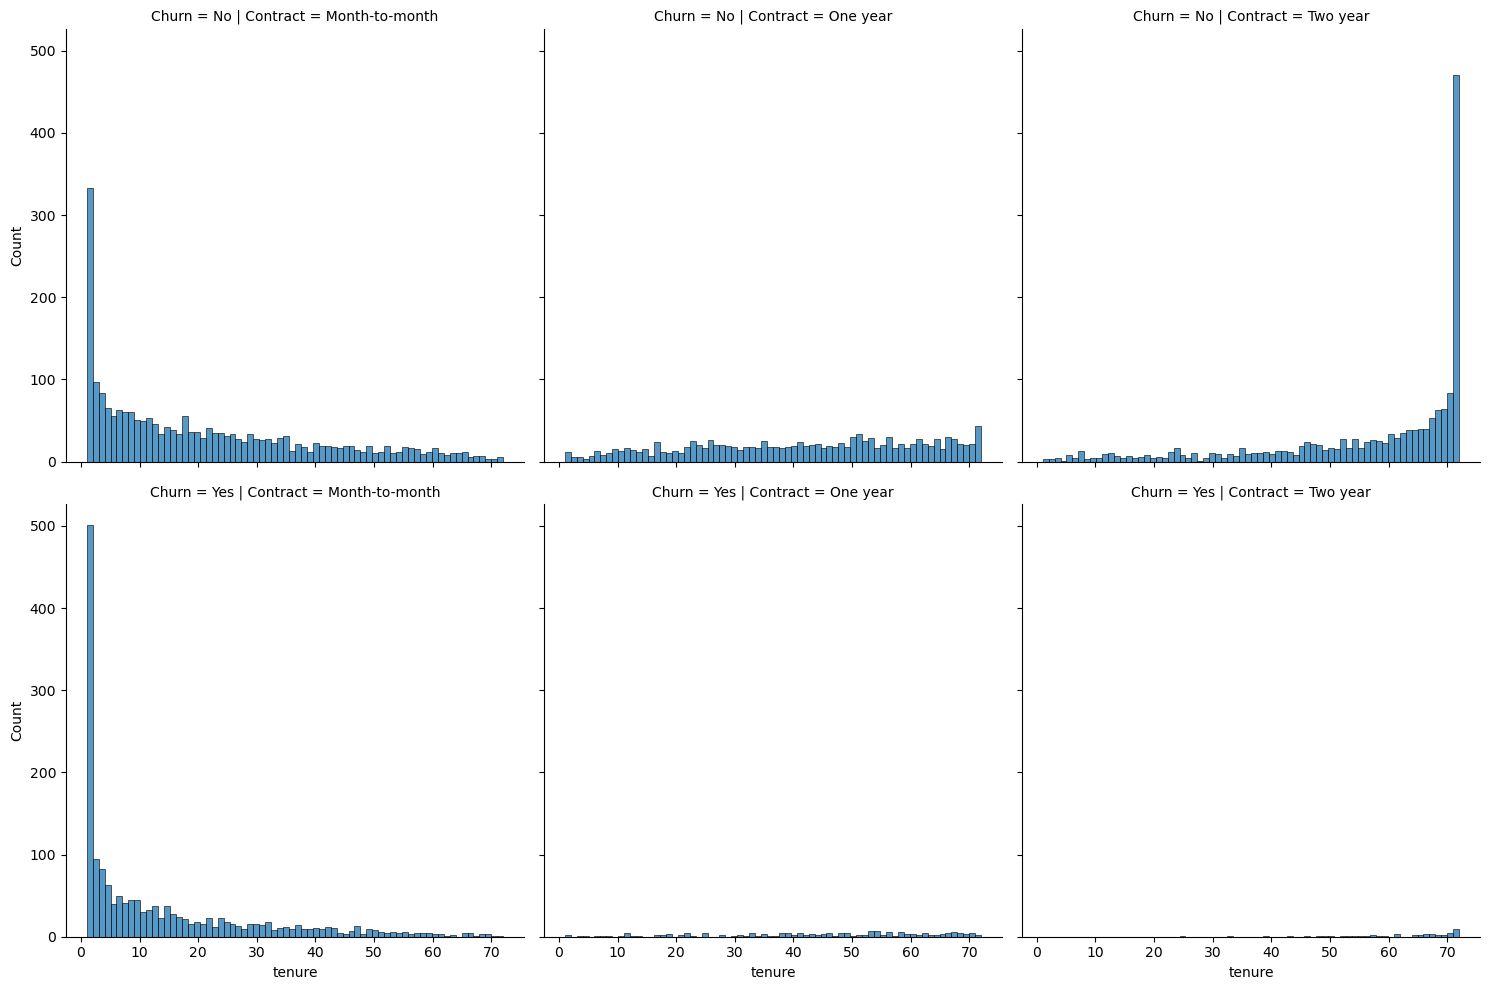

In [32]:
#CODE HERE
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn')

<img src="fig6.png">

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

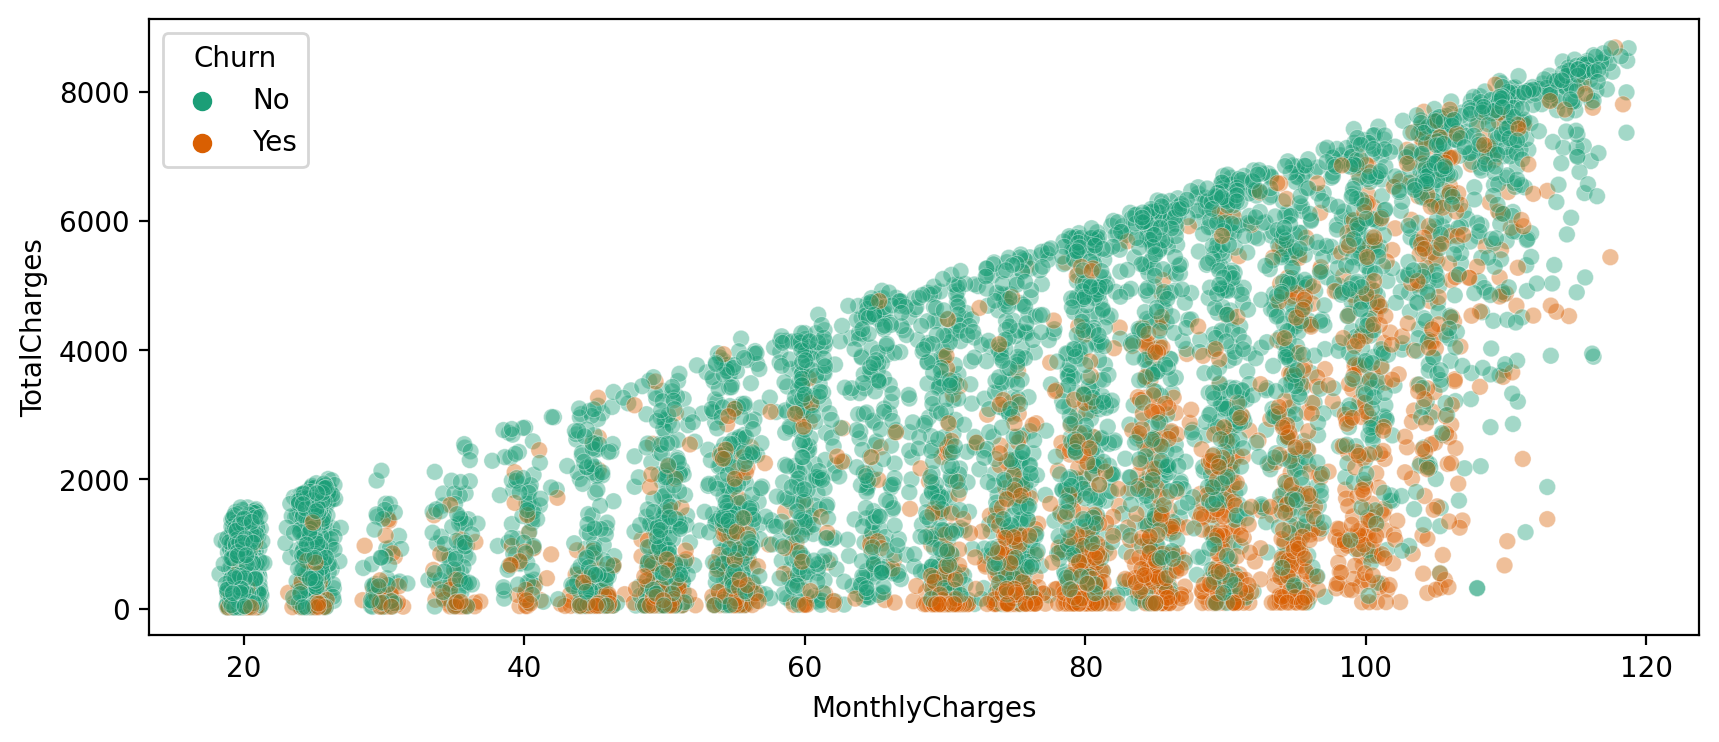

In [38]:
#CODE HERE
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn'
                ,alpha=0.4,linewidth=0.3,palette='Dark2')

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [45]:
df.groupby(['Churn','tenure']).count().transpose()

Churn              No                                        ... Yes        \
tenure             1    2    3   4   5   6   7   8   9   10  ...  63 64 65   
customerID        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
gender            233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Partner           233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Dependents        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
InternetService   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Contract          233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   

Churn                                     
tenure            66  67 68 69  70 71 72  
customerID        13  10  9  8  11  6  6  
gender            13  10  9  8  11  6  6  
SeniorCitizen     13  10  9  8  11  6  6  
Partner           13  10  9  8  11  6  6  
Dependents        13  10  9  8  11  6  6  
PhoneService      13  10  9  8  11  6  6  
MultipleLines     13  10  9  8  11  6  6  
InternetService   13  10  9  8  11  6  6  
OnlineSecurity    13  10  9  8  11  6  6  
OnlineBackup      13  10  9  8  11  6  6  
DeviceProtection  13  10  9  8  11  6  6  
TechSupport       13  10  9  8  11  6  6  
StreamingTV       13  10  9  8  11  6  6  
StreamingMovies   13  10  9  8  11  6  6  
Contract          13  10  9  8  11  6  6  
PaperlessBilling  13  10  9  8  11  6  6  
PaymentMethod     13  10  9  8  11  6  6  
MonthlyCharges    13  10  9  8  11  6  6  
TotalCharges      13  10  9  8  11  6  6  

[19 rows x 144 columns]

In [49]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [50]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [51]:
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [52]:
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [54]:
churn_rate = 100*yes_churn/(no_churn+yes_churn)

In [56]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

<Axes: xlabel='tenure'>

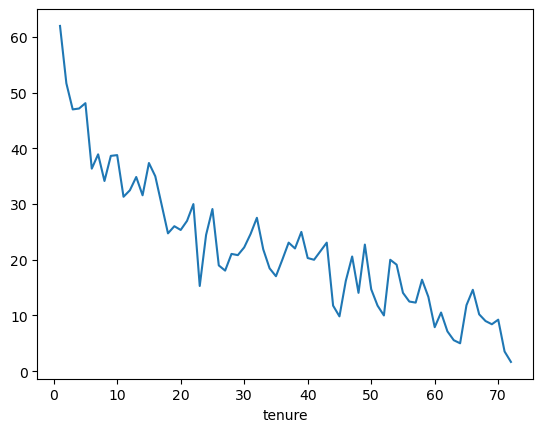

In [57]:
#CODE HERE
churn_rate.transpose()['customerID'].plot()

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [58]:
# CODE HERE
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

In [59]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [61]:
df['tenure'].apply(cohort)

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7027      12-24 Months
7028    Over 48 Months
7029       0-12 Months
7030       0-12 Months
7031    Over 48 Months
Name: tenure, Length: 7032, dtype: object

In [62]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [64]:
df[['Tenure Cohort','tenure']]

,Tenure Cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

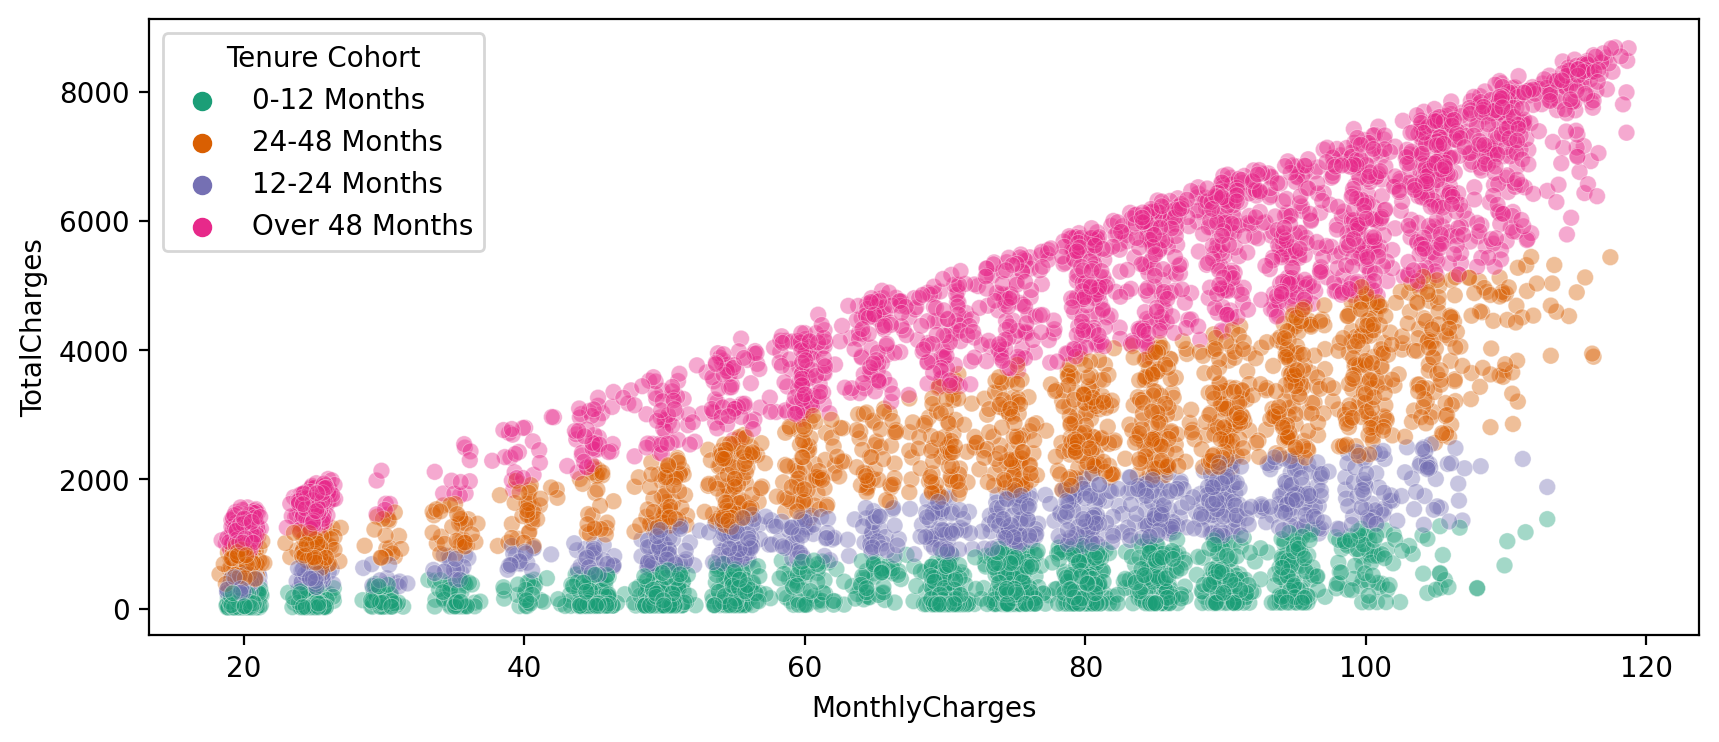

In [65]:
#CODE HERE
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort'
                ,alpha=0.4,linewidth=0.3,palette='Dark2')

<img src='fig10.png'>

**TASK: Create a count plot showing the churn count per cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

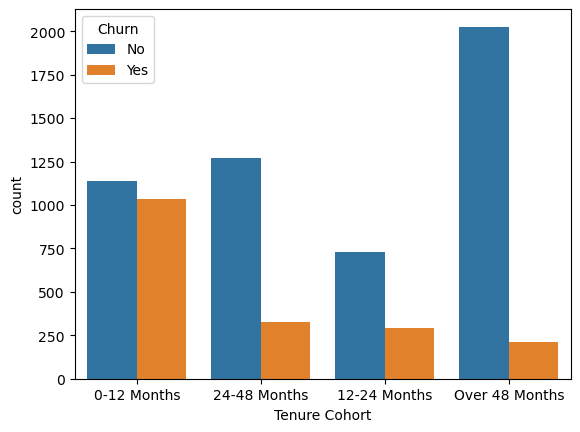

In [66]:
# CODE HERE
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

<img src='cplot.png'>

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

C:\Users\jagam\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


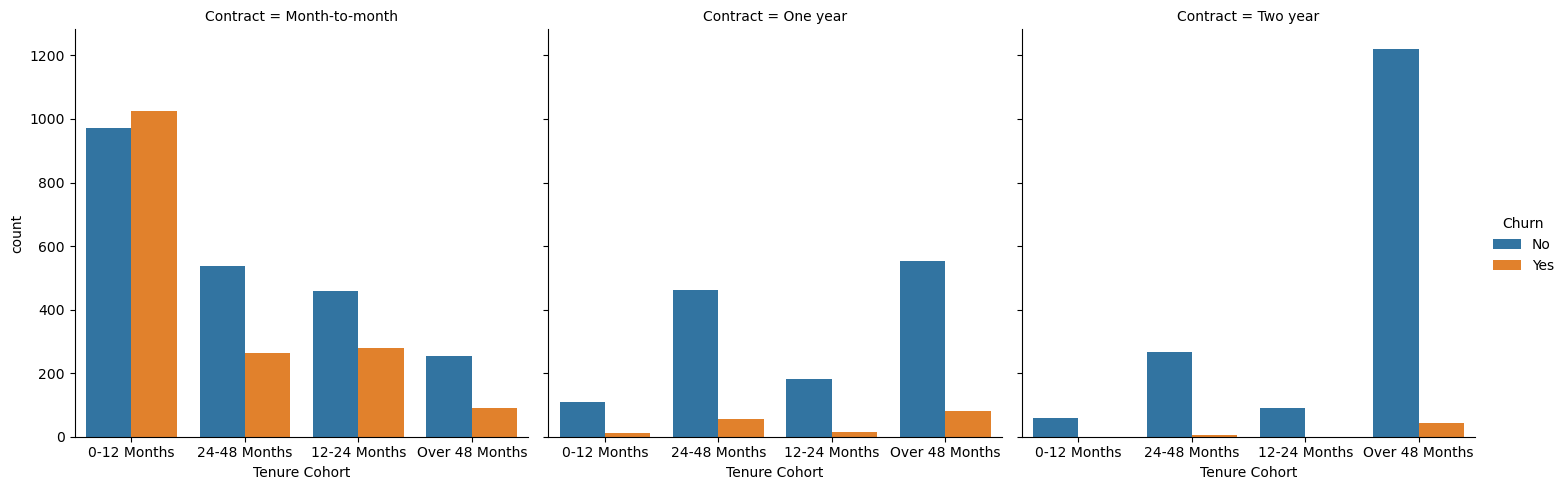

In [68]:
#CODE HERE
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',kind='count',col='Contract')

<img src='fig11.png'>

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [69]:
#CODE HERE
# Churn is the target column and customerID is unique to each instance of data
X = df.drop(['Churn','customerID'],axis=1)

In [70]:
X = pd.get_dummies(X,drop_first=True,dtype='int')

In [71]:
y = df['Churn']

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [72]:
#CODE HERE
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dt = DecisionTreeClassifier(max_depth=6)

In [76]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [77]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [78]:
preds = dt.predict(X_test)

In [79]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



In [80]:
cm = confusion_matrix(y_test,preds)

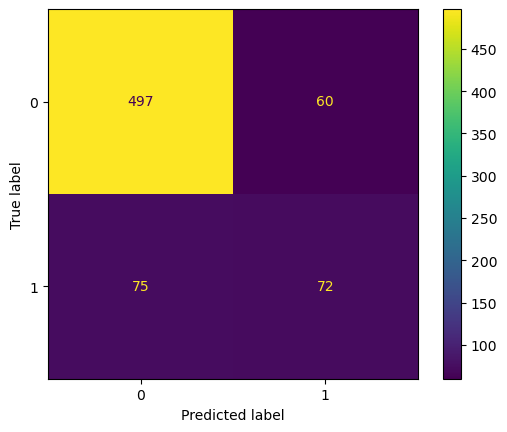

In [82]:
ax = ConfusionMatrixDisplay(confusion_matrix=cm)
ax.plot()

In [83]:
dt.feature_importances_

array([0.01082504, 0.42391407, 0.04229274, 0.06799038, 0.00123697,
       0.        , 0.        , 0.00088963, 0.00696195, 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.02628952, 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [84]:
impt_feats = pd.DataFrame(data=dt.feature_importances_,
                         index=X.columns,
                         columns=['Feat Imp'])

In [87]:
impt_feats =impt_feats.sort_values('Feat Imp')

In [88]:
impt_feats

,Feat Imp
Tenure Cohort_Over 48 Months,0.000000
StreamingTV_Yes,0.000000
StreamingTV_No internet service,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_Yes,0.000000
Tenure Cohort_24-48 Months,0.000000
OnlineBackup_No internet service,0.000000
OnlineSecurity_No internet service,0.000000
StreamingMovies_No internet service,0.000000
InternetService_No,0.000000


In [92]:
impt_feats = impt_feats[impt_feats['Feat Imp']>0]

In [93]:
impt_feats

,Feat Imp
PhoneService_Yes,0.000890
gender_Male,0.001237
OnlineBackup_Yes,0.005341
MultipleLines_No phone service,0.006962
TechSupport_Yes,0.007868
OnlineSecurity_Yes,0.008376
Contract_One year,0.010021
SeniorCitizen,0.010825
MultipleLines_Yes,0.012432
DeviceProtection_No internet service,0.026290


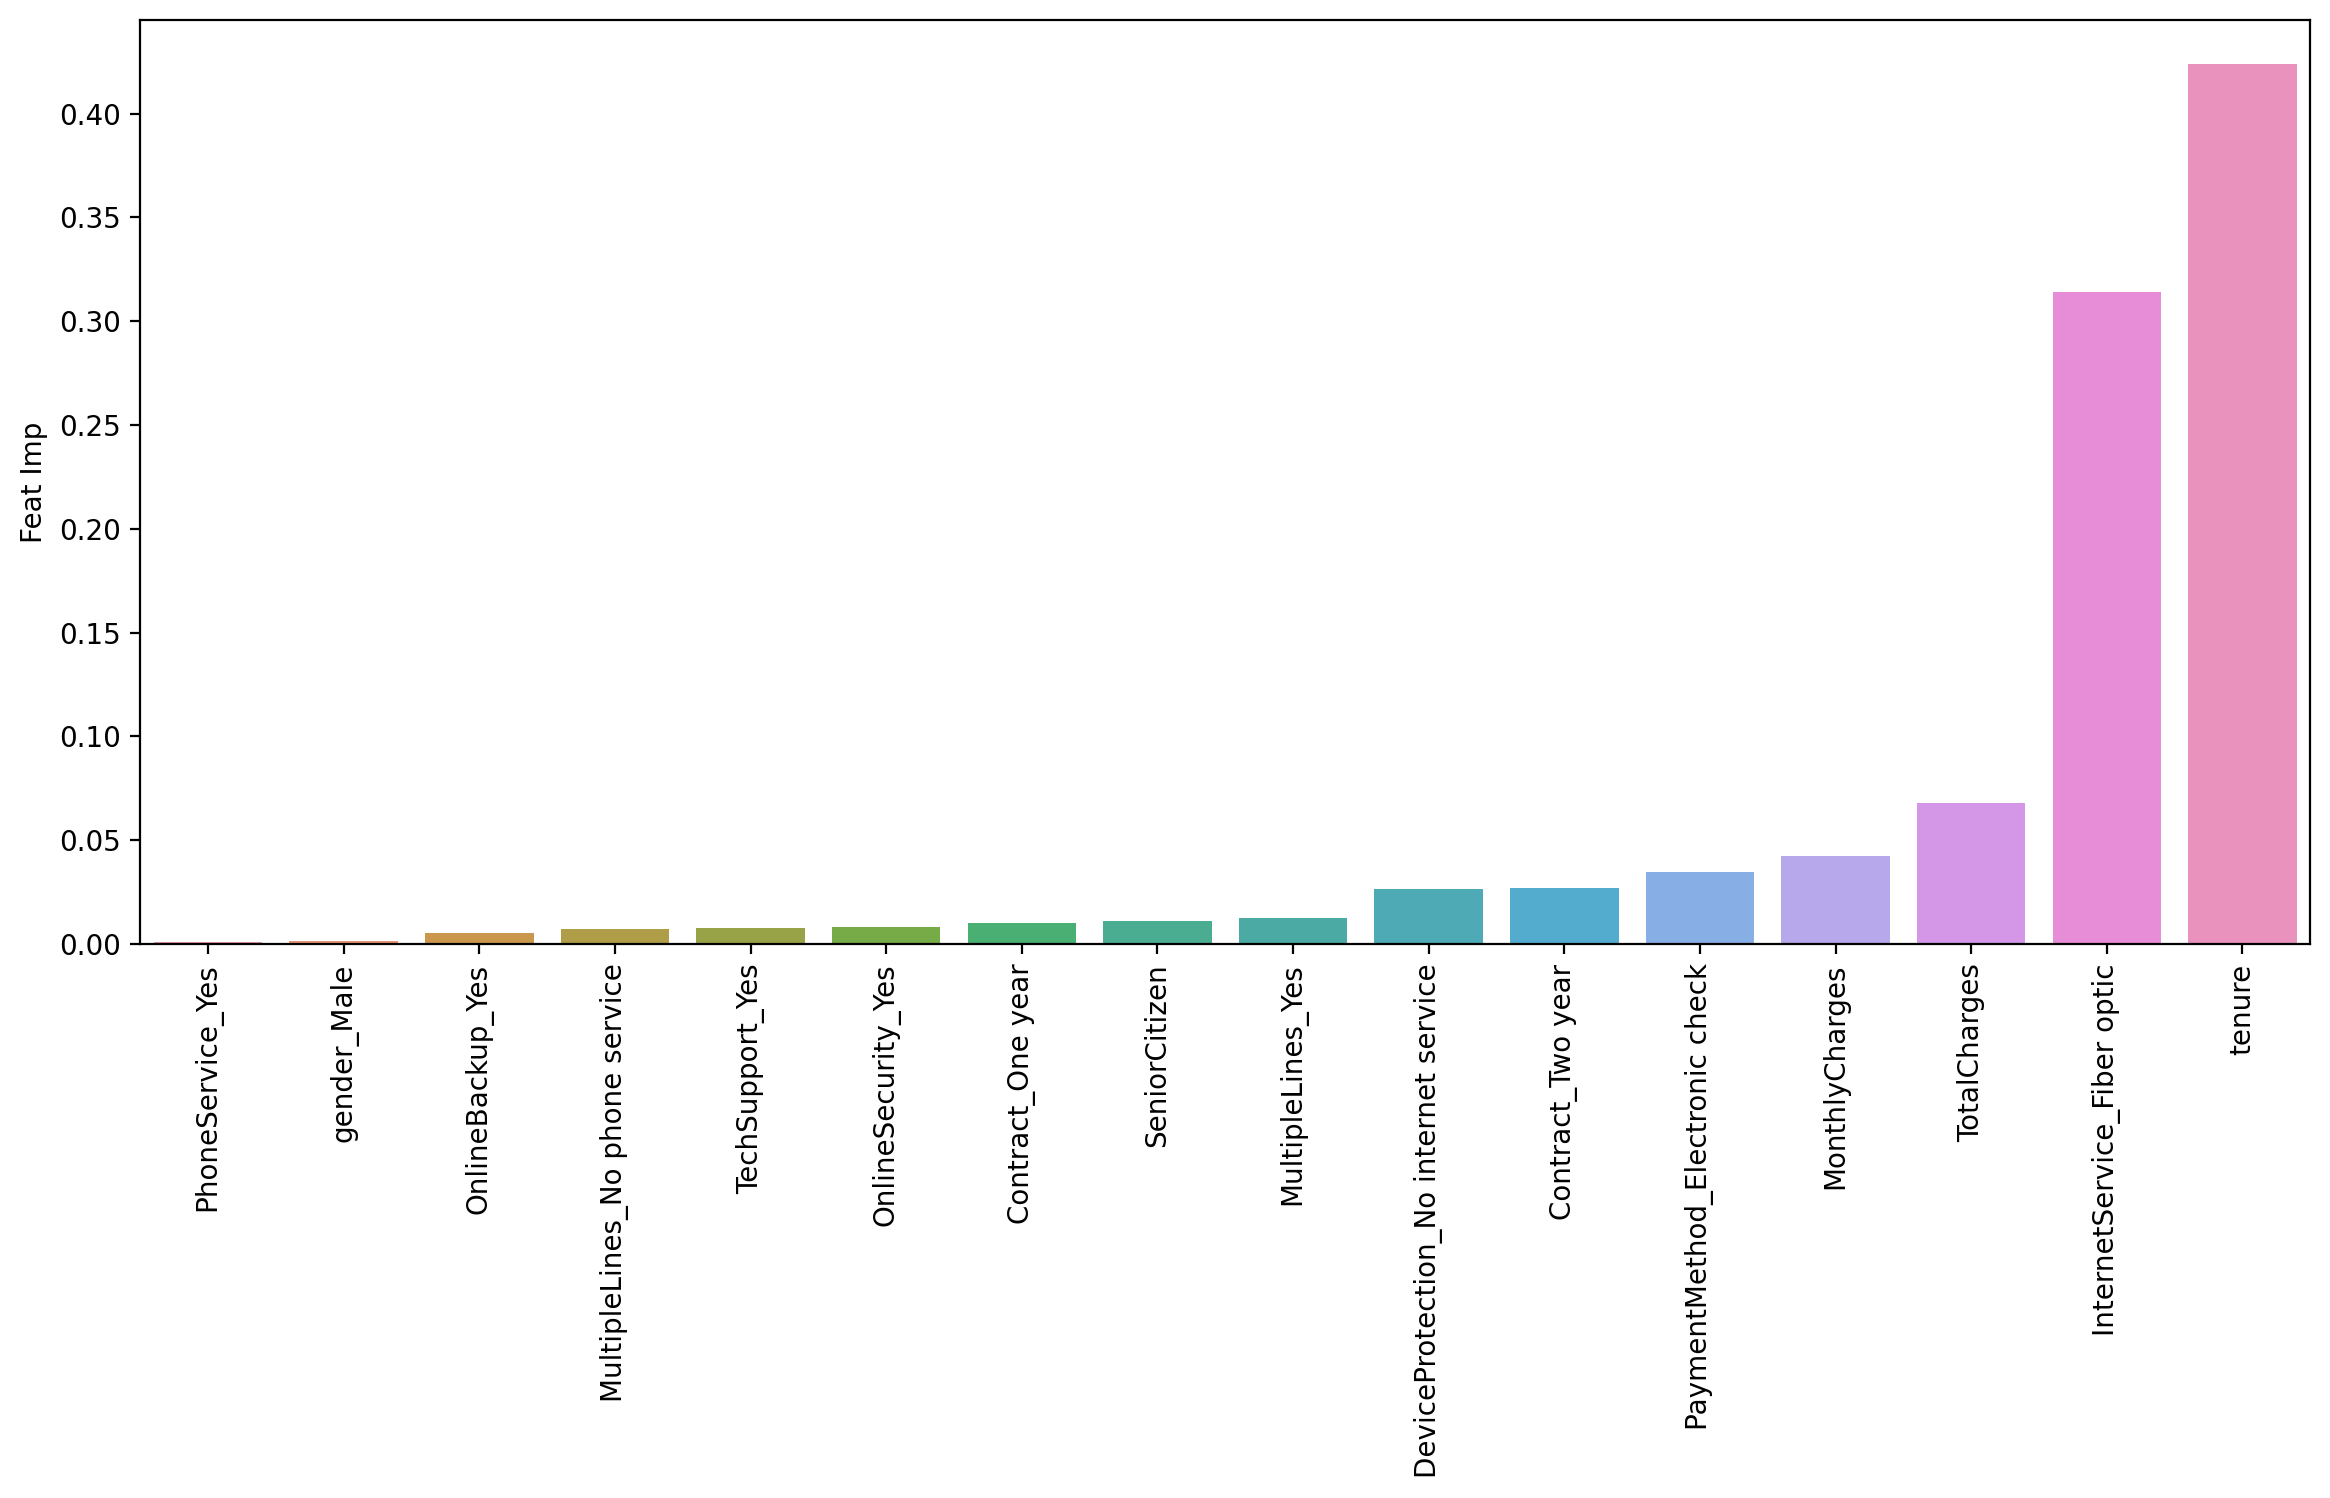

In [98]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=impt_feats,x=impt_feats.index,y='Feat Imp')
plt.xticks(rotation = 90);

In [99]:
from sklearn.tree import plot_tree

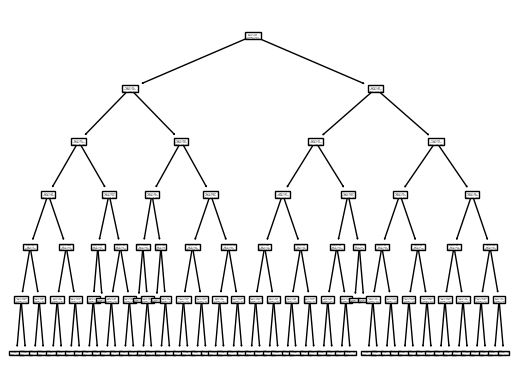

In [101]:
plot_tree(dt);

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [102]:
#CODE HERE
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf = RandomForestClassifier(max_depth=6)

In [108]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [109]:
preds = rf.predict(X_test)

In [110]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.61      0.45      0.52       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.81       704



In [111]:
cm = confusion_matrix(y_test,preds)

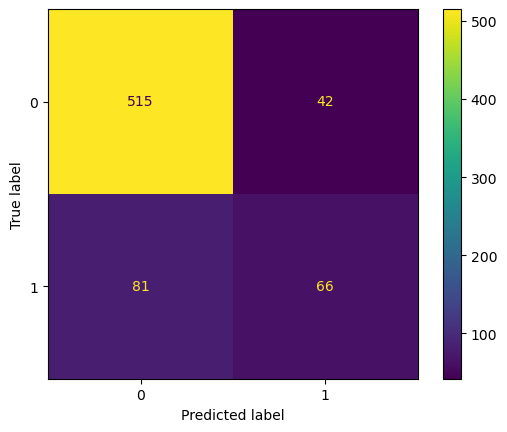

In [113]:
ax = ConfusionMatrixDisplay(cm)
ax.plot()

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [114]:
#CODE HERE
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [129]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [116]:
gb_model = GradientBoostingClassifier()

In [130]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [131]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [132]:
ada_preds = ada_model.predict(X_test)

In [133]:
gb_pred = gb_model.predict(X_test)

In [134]:
print(classification_report(ada_preds,y_test))

              precision    recall  f1-score   support

          No       0.92      0.88      0.90       580
         Yes       0.53      0.63      0.58       124

    accuracy                           0.84       704
   macro avg       0.72      0.76      0.74       704
weighted avg       0.85      0.84      0.84       704



In [135]:
print(classification_report(gb_pred,y_test))

              precision    recall  f1-score   support

          No       0.90      0.87      0.89       577
         Yes       0.50      0.57      0.53       127

    accuracy                           0.82       704
   macro avg       0.70      0.72      0.71       704
weighted avg       0.83      0.82      0.82       704



In [136]:
ada_cm = confusion_matrix(ada_preds,y_test)

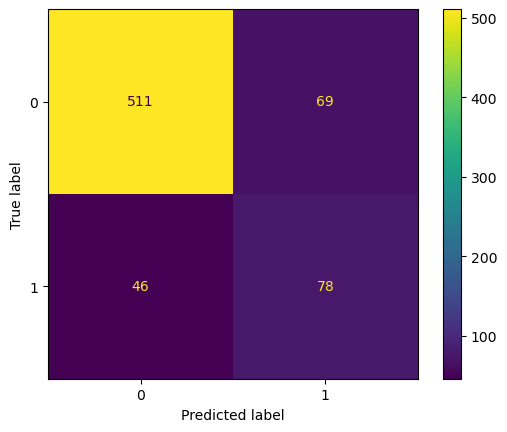

In [137]:
ax = ConfusionMatrixDisplay(ada_cm)
ax.plot()

In [138]:
gred_cm = confusion_matrix(gb_pred,y_test)

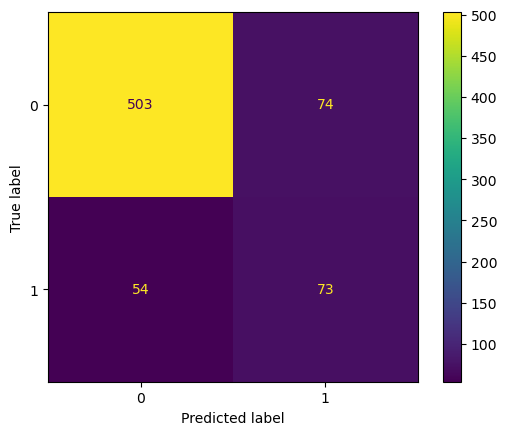

In [139]:
ax = ConfusionMatrixDisplay(gred_cm)
ax.plot()

**TASK: Analyze your results, which model performed best for you?**

In [294]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!